In [1]:
# importación de las librerias y bibliotecas que serán utilizadas para el análisis y preparación de los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

In [2]:
#Lectura del dataset 
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
#Visualización inicial del conjunto de datos
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Evaluación de los datos

In [4]:
#Visualizamos la informacion básica del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#Visualización de la información estadística del conjunto de datos
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# Validación de la correlación entre las variables de entrada con relación a la variable de salida.
corr_matrix = df.corr()
corr_matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
id                   0.006388
Name: stroke, dtype: float64

In [7]:
#Validación si hay algún valor nulo en el conjunto de datos.
df.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [8]:
#Validación de la cantidad de ejemplos que posee el dataset segun la variable de salida.
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [9]:
#Transformación de las columnas categoricas a numericas.
df_new = pd.get_dummies(df, columns=['gender','ever_married','work_type','Residence_type','smoking_status'], drop_first=True)

In [10]:
#Eliminación de datos que son irrelevantes y que podrian afectar los resultado.
df_new = df_new.drop(['id'], axis=1)

In [11]:
#Vizualición de los cambios aplicados
df_new

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,NaN,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,1,0,1,0,0,0,1,0,0


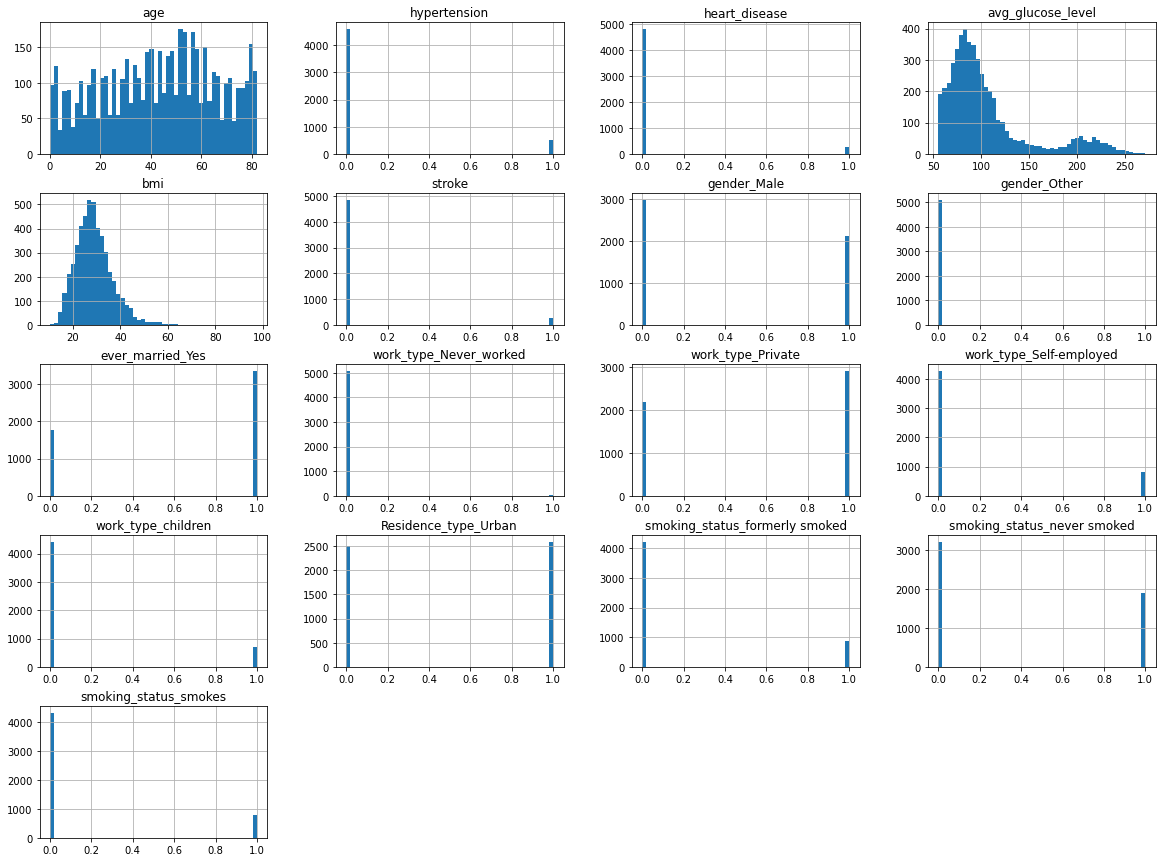

In [12]:
# Representación gráfica de la distribución de los atributos
df_new.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
edad_grupo = pd.cut(x=df_new['age'],
                    bins=[0,10,20,30,40,50,60,70,80,85,float('inf')], 
                    labels=["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-85","85+"])
edad_total = edad_grupo.value_counts().sort_index()

edad_indexes = edad_total.index.values
edad_valores = edad_total.values

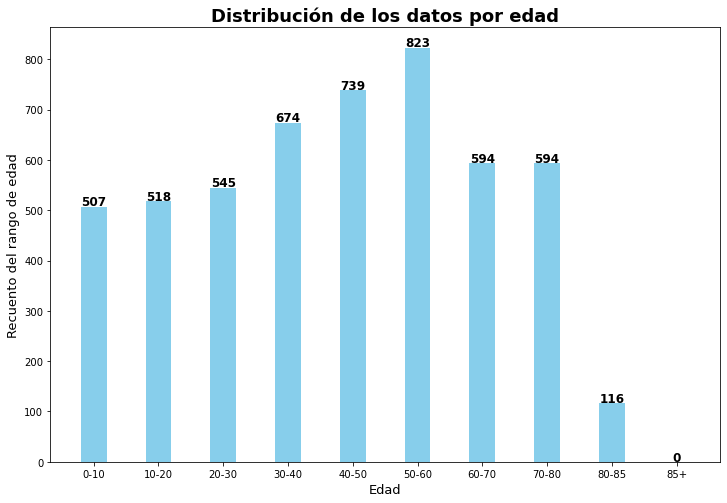

In [14]:
plt.figure(figsize = (12, 8))
 
# Creación de una gráfica bar plot para representar la distribución de la edad
edad_bar = plt.bar(edad_indexes, edad_valores, color ='Skyblue', width = 0.4)
for i, rectangle in enumerate(edad_bar):
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width()/2, height+2,
             edad_valores[i], horizontalalignment='center', weight='bold', fontsize=12)
 
plt.xlabel("Edad", fontsize=13)
plt.ylabel("Recuento del rango de edad", fontsize=13)
plt.title("Distribución de los datos por edad", weight='bold', fontsize=18)
plt.show()

In [15]:
glucose_grupo = pd.cut(x=df_new['avg_glucose_level'],
                    bins=[50,100,150,200,250,275,float('inf')], 
                    labels=["50-100","100-150","150-200","200-250","250-275","275+"])
glucose_total = glucose_grupo.value_counts().sort_index()

glucose_indexes = glucose_total.index.values
glucose_valores = glucose_total.values

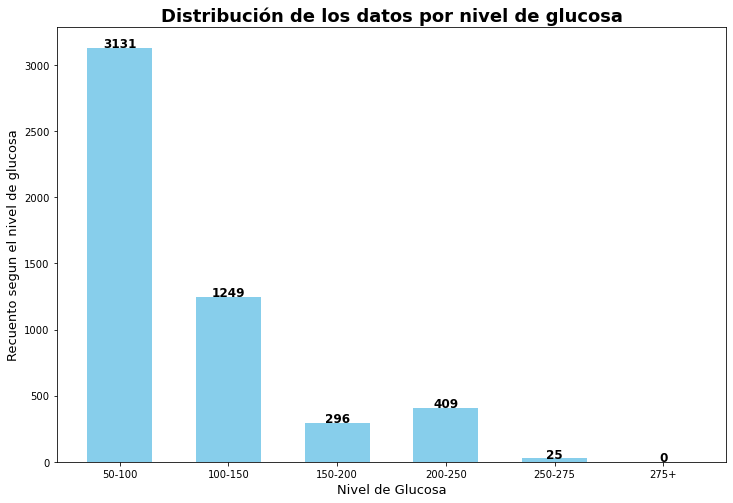

In [16]:
plt.figure(figsize = (12,8))
 
# Creación de una gráfica bar plot para representar la distribución de la edad
glucose_bar = plt.bar(glucose_indexes, glucose_valores, color ='Skyblue', width = 0.6)
for i, rectangle in enumerate(glucose_bar):
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width()/2, height+2,
             glucose_valores[i], horizontalalignment='center', weight='bold', fontsize=12)
 
plt.xlabel("Nivel de Glucosa", fontsize=13)
plt.ylabel("Recuento segun el nivel de glucosa", fontsize=13)
plt.title("Distribución de los datos por nivel de glucosa", weight='bold', fontsize=18)
plt.show()

In [17]:
bmi_grupo = pd.cut(x=df_new['bmi'],
                    bins=[10,20,30,40,50,60,70,80,90,97,float('inf')], 
                    labels=["10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-97","97+"])
bmi_total = bmi_grupo.value_counts().sort_index()

bmi_indexes = bmi_total.index.values
bmi_valores = bmi_total.values

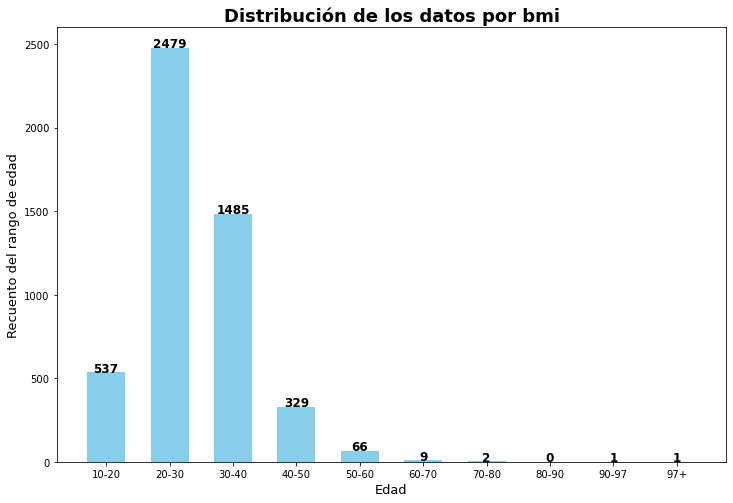

In [18]:
plt.figure(figsize = (12,8))
 
# Creación de una gráfica bar plot para representar la distribución de la edad
bmi_bar = plt.bar(bmi_indexes, bmi_valores, color ='Skyblue', width = 0.6)
for i, rectangle in enumerate(bmi_bar):
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width()/2, height+2,
             bmi_valores[i], horizontalalignment='center', weight='bold', fontsize=12)
 
plt.xlabel("Edad", fontsize=13)
plt.ylabel("Recuento del rango de edad", fontsize=13)
plt.title("Distribución de los datos por bmi", weight='bold', fontsize=18)
plt.show()

Text(0.5, 1.0, 'Gráfica de la cantidad por género que sufrieron un accidente cerebrovascular')

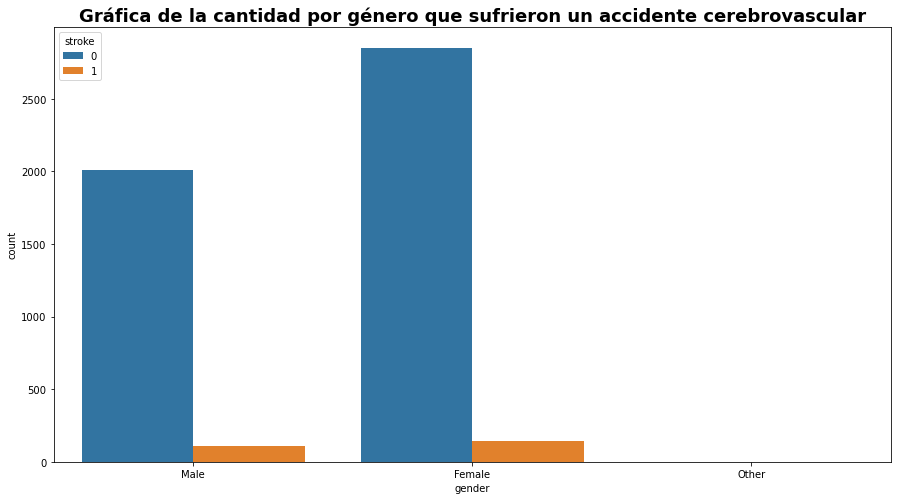

In [19]:
# Creación de una gráfica por género de las personas que hicieron si o no click al anuncio
plt.figure(figsize=[15,8])
sns.countplot(x = 'gender', hue = 'stroke', data = df)
plt.title('Gráfica de la cantidad por género que sufrieron un accidente cerebrovascular', weight='bold', fontsize=18)

Text(0.5, 1.0, 'Gráfica de la cantidad por género que sufrieron un accidente cerebrovascular')

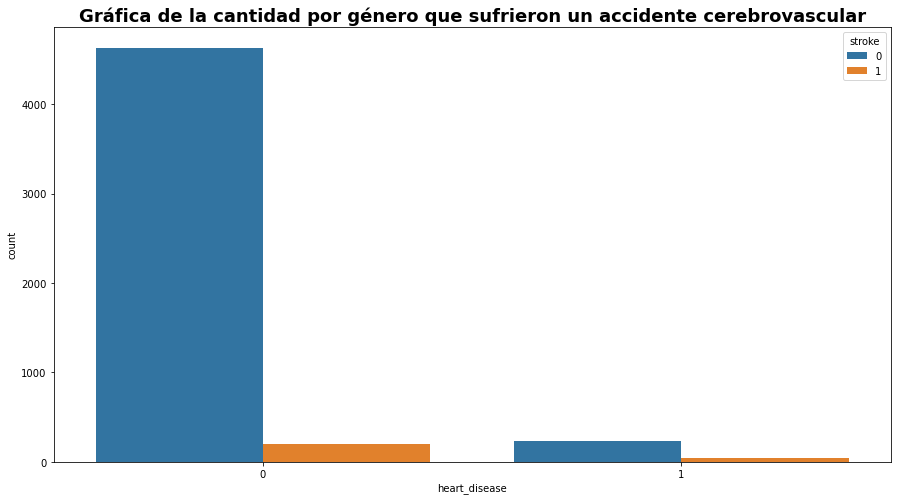

In [20]:
# Creación de una gráfica por género de las personas que hicieron si o no click al anuncio
plt.figure(figsize=[15,8])
sns.countplot(x = 'heart_disease', hue = 'stroke', data = df)
plt.title('Gráfica de la cantidad por género que sufrieron un accidente cerebrovascular', weight='bold', fontsize=18)

Text(0.5, 1.0, 'Gráfica de la cantidad por género que sufrieron un accidente cerebrovascular')

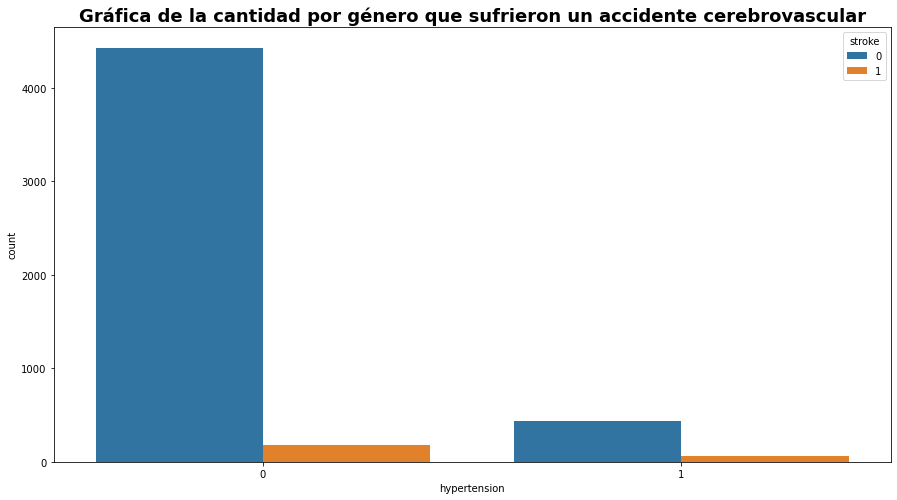

In [21]:
# Creación de una gráfica por género de las personas que hicieron si o no click al anuncio
plt.figure(figsize=[15,8])
sns.countplot(x = 'hypertension', hue = 'stroke', data = df)
plt.title('Gráfica de la cantidad por género que sufrieron un accidente cerebrovascular', weight='bold', fontsize=18)

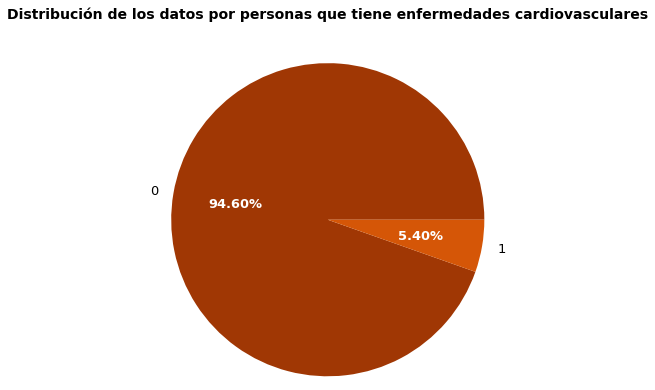

In [22]:
#Creación de una gráfica para representar el porcentaje por género
Gender = df['heart_disease'].value_counts()

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=Gender, labels=Gender.index, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("YlOrBr_r"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos por personas que tiene enfermedades cardiovasculares', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

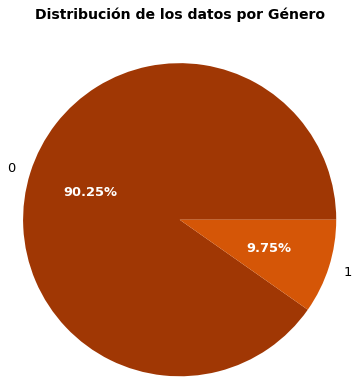

In [23]:
#Creación de una gráfica para representar el porcentaje por género
Gender = df['hypertension'].value_counts()

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=Gender, labels=Gender.index, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("YlOrBr_r"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos por Género', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

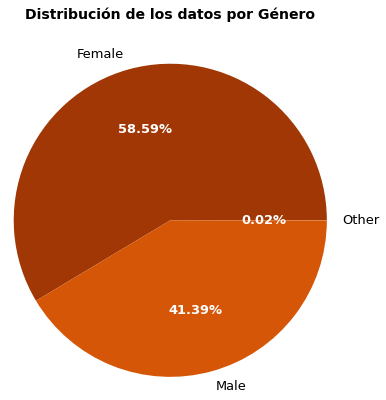

In [24]:
#Creación de una gráfica para representar el porcentaje por género
Gender = df['gender'].value_counts()

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=Gender, labels=Gender.index, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("YlOrBr_r"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos por Género', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

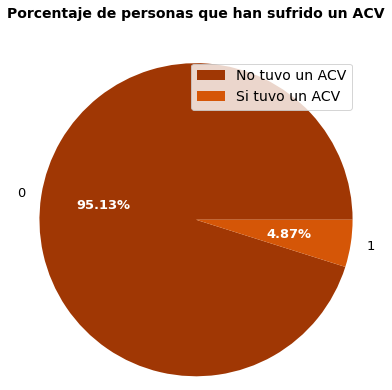

In [25]:
#Creación de una gráfica para representar el porcentaje por género
Gender = df['stroke'].value_counts()

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=Gender, labels=Gender.index, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("YlOrBr_r"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Porcentaje de personas que han sufrido un ACV', y=1.1, weight='bold', fontsize=14)
ax.legend(labels=['No tuvo un ACV', 'Si tuvo un ACV'], fontsize=14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

## Relleno de valores nulos y escalado de los datos

In [26]:
# Conjunto de datos general
X_df = df_new.drop("stroke", axis=1)
y_df = df_new["stroke"].copy()

In [27]:
# Construcción de un pipeline para rellenar los valores nulos con la mediana y scalar los datos 
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('rbst_scaler', RobustScaler()),
    ])

In [28]:
# Rellenamos los valores nulos con la mediana y scalamos los datos
X_prep = num_pipeline.fit_transform(X_df)

In [29]:
# Transformamos el resultado a un DataFrame de Pandas
X_prep = pd.DataFrame(X_prep, columns=X_df.columns, index=y_df.index)

In [30]:
X_prep

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.611111,0.0,1.0,3.712987,0.944444,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.444444,0.0,0.0,2.994300,0.000000,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,-1.0,0.0,1.0,0.0
2,0.972222,0.0,1.0,0.380920,0.488889,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0
3,0.111111,0.0,0.0,2.153481,0.700000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.944444,1.0,0.0,2.231917,-0.455556,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,-1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.972222,1.0,0.0,-0.220790,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5106,1.000000,0.0,0.0,0.904193,1.322222,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,1.0,0.0
5107,-0.277778,0.0,0.0,-0.241417,0.277778,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,-1.0,0.0,1.0,0.0
5108,0.166667,0.0,0.0,2.019406,-0.277778,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0


## Aplicamos selección de características con Random Forest

In [31]:
# Utilizamos Random Forest para realizar selección de características
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X_prep, y_df)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [32]:
# Seleccionamos las características más importantes
feature_importances = {name: score for name, score in zip(list(X_prep), clf_rnd.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(10)

avg_glucose_level                 0.278373
age                               0.245129
bmi                               0.238853
gender_Male                       0.031299
Residence_type_Urban              0.031287
hypertension                      0.023972
smoking_status_formerly smoked    0.023918
work_type_Private                 0.023355
smoking_status_never smoked       0.023317
heart_disease                     0.023304
dtype: float64

In [33]:
# Reducimos el conjunto de datos a las 10 características más importantes
features = list(feature_importances_sorted.head(20).index)
X_select = X_prep[features].copy()

In [34]:
X_select

,avg_glucose_level,age,bmi,gender_Male,Residence_type_Urban,hypertension,smoking_status_formerly smoked,work_type_Private,smoking_status_never smoked,heart_disease,work_type_Self-employed,ever_married_Yes,smoking_status_smokes,work_type_children,work_type_Never_worked,gender_Other
0,3.712987,0.611111,0.944444,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.994300,0.444444,0.000000,0.0,-1.0,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.380920,0.972222,0.488889,1.0,-1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.153481,0.111111,0.700000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2.231917,0.944444,-0.455556,0.0,-1.0,1.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,-0.220790,0.972222,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5106,0.904193,1.000000,1.322222,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5107,-0.241417,-0.277778,0.277778,0.0,-1.0,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5108,2.019406,0.166667,-0.277778,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Balanceo del dataset

Según el análisis realizado, el conjunto de datos posee un desbalance con 7963 clientes que se quedan en el banco y 2037 personas que se van del banco, al entrenar los diferentes algoritmos generaria una matriz de confusión desbalanceda, por lo que se hara uso de la combinación de las tecnicas de sobremuestreo y submuestreo para equuilibrar la cantidad de datos.

## Sobremuestreo + Submuestreo

In [35]:
no = y_df.sum()
si = y_df.shape[0]- no
print('Personas que no tuvieron un ACV:',si,'Personas que si tuvieron un ACV:', no)

Personas que no tuvieron un ACV: 4861 Personas que si tuvieron un ACV: 249


In [36]:
#Importamos los paquetes
from imblearn.combine import SMOTETomek

#Inicialización del método combinado
#SMOTE Tomek
smoteT = SMOTETomek()

In [37]:
#Sobremuestreo con Smote seguido de un submuestreo con Uniones de Tomek
X_smoteT, y_smoteT = smoteT.fit_resample(X_select, y_df)
no_smoteT = y_smoteT.sum()
si_smoteT = y_smoteT.shape[0]- no_smoteT
print('Personas que no tuvieron un ACV:',no_smoteT ,'Personas que si tuvieron un ACV:', si_smoteT)
X_smoteT

Personas que no tuvieron un ACV: 4849 Personas que si tuvieron un ACV: 4849


,avg_glucose_level,age,bmi,gender_Male,Residence_type_Urban,hypertension,smoking_status_formerly smoked,work_type_Private,smoking_status_never smoked,heart_disease,work_type_Self-employed,ever_married_Yes,smoking_status_smokes,work_type_children,work_type_Never_worked,gender_Other
0,3.712987,0.611111,0.944444,1.000000,0.000000,0.000000,1.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,2.994300,0.444444,0.000000,0.000000,-1.000000,0.000000,0.0,-1.000000,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0
2,0.380920,0.972222,0.488889,1.000000,-1.000000,0.000000,0.0,0.000000,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,2.153481,0.111111,0.700000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0
4,2.231917,0.944444,-0.455556,0.000000,-1.000000,1.000000,0.0,-1.000000,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9693,3.198840,0.486971,0.035641,1.000000,-0.072902,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0
9694,-0.532182,0.787015,0.411811,0.000000,0.000000,0.000000,0.0,-1.000000,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0
9695,4.161493,0.488477,0.739151,0.700673,-1.000000,0.700673,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9696,1.249992,0.582665,0.354216,1.000000,-0.771081,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


## Entrenar y evaluar utilizando regresión logística

In [38]:
#División del dataset en conjunto de entramiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_smoteT, y_smoteT, test_size = 0.25, random_state=0)

In [39]:
# Entrenamos un algoritmo basado en regresión logística
from sklearn.linear_model import LogisticRegression

#Creación del modelo
clf = LogisticRegression(random_state =0).fit(X_train, y_train)

In [40]:
#Prediccion con el conjunto de pruebas
y_pred = clf.predict(X_val)

In [41]:
#Validación del accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.790


In [42]:
#Validación de la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[922, 274],
       [235, 994]], dtype=int64)

In [43]:
#Descripción de los resultados de diferentes métricas de medición sobre el modelo entrenado y probado
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[922 274]
 [235 994]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1196
           1       0.78      0.81      0.80      1229

    accuracy                           0.79      2425
   macro avg       0.79      0.79      0.79      2425
weighted avg       0.79      0.79      0.79      2425



## Entrenar y evaluar utilizando bosques aleatorios

In [44]:
#División del dataset en conjunto de entramiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_smoteT, y_smoteT, test_size = 0.25, random_state=0)

In [45]:
# Importación de la librería 
from sklearn.ensemble import RandomForestClassifier

#Creación del modelo
ranforest = RandomForestClassifier()
ranforest.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
#Prediccion con el conjunto de pruebas
y_pred = ranforest.predict(X_val)

In [47]:
#Validación del accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.972


In [48]:
#Validación de la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[1155,   41],
       [  28, 1201]], dtype=int64)

C:\Users\eliza\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


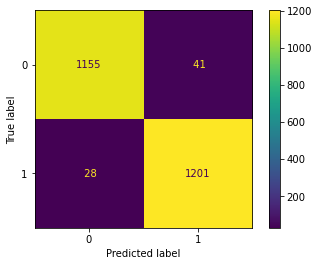

In [49]:
#Representación gráfica de los resultados de la matriz de confusión con el conjunto de pruebas
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(ranforest, X_val, y_val, values_format='3g')

In [50]:
#Descripción de los resultados de diferentes métricas de medición sobre el modelo entrenado y probado
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[1155   41]
 [  28 1201]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1196
           1       0.97      0.98      0.97      1229

    accuracy                           0.97      2425
   macro avg       0.97      0.97      0.97      2425
weighted avg       0.97      0.97      0.97      2425



## Entrenar y evaluar utilizando redes neuronales

In [51]:
#División del dataset en conjunto de entramiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_smoteT, y_smoteT, test_size = 0.25, random_state=0)

In [52]:
# Entrenamiento del algoritmo
from keras import models
from keras import layers
from tensorflow.python import tf2
import keras_metrics as km


model = models.Sequential()
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=[km.f1_score()])

In [53]:
# Entrenamos el algoritmo
history = model.fit(X_train,
                   y_train,
                   epochs=40,
                   batch_size=512)

Epoch 1/40


C:\Users\eliza\AppData\Roaming\Python\Python38\site-packages\keras\engine\base_layer.py:1348: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


15/15 [==============================] - 1s 1ms/step - loss: 0.6148 - f1_score: 0.7318
Epoch 2/40
15/15 [==============================] - 0s 2ms/step - loss: 0.5306 - f1_score: 0.7593
Epoch 3/40
15/15 [==============================] - 0s 2ms/step - loss: 0.4842 - f1_score: 0.7716
Epoch 4/40
15/15 [==============================] - 0s 2ms/step - loss: 0.4608 - f1_score: 0.7801
Epoch 5/40
15/15 [==============================] - 0s 2ms/step - loss: 0.4475 - f1_score: 0.7858
Epoch 6/40
15/15 [==============================] - 0s 2ms/step - loss: 0.4385 - f1_score: 0.7905
Epoch 7/40
15/15 [==============================] - 0s 2ms/step - loss: 0.4309 - f1_score: 0.7939
Epoch 8/40
15/15 [==============================] - 0s 2ms/step - loss: 0.4257 - f1_score: 0.7969
Epoch 9/40
15/15 [==============================] - 0s 2ms/step - loss: 0.4178 - f1_score: 0.7995
Epoch 10/40
15/15 [==============================] - 0s 2ms/step - loss: 0.4131 - f1_score: 0.8018
Epoch 11/40
15/15 [===========

In [55]:
#Prediccion con el conjunto de pruebas
y_pred  = model.predict(X_val)
y_pred = (y_pred>0.5)

In [56]:
#Validación del accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.885


In [57]:
#Validación de la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[ 958,  238],
       [  41, 1188]], dtype=int64)

<AxesSubplot:>

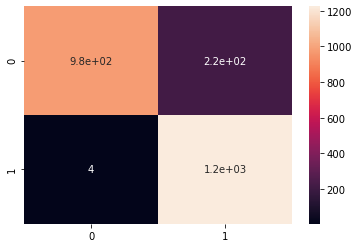

In [68]:
#Representación gráfica de los resultados de la matriz de confusión con el conjunto de pruebas
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True)

In [69]:
#Descripción de los resultados de diferentes métricas de medición sobre el modelo entrenado y probado
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[ 978  218]
 [   4 1225]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1196
           1       0.85      1.00      0.92      1229

    accuracy                           0.91      2425
   macro avg       0.92      0.91      0.91      2425
weighted avg       0.92      0.91      0.91      2425



## Entrenar y evaluar utilizando K-Nearest Neighbors

In [70]:
#División del dataset en conjunto de entramiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_smoteT, y_smoteT, test_size = 0.25, random_state=0)

In [71]:
# Ajustar el clasificador en el Conjunto de Entrenamiento
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [72]:
# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_val)

In [73]:
#Validación del accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.908


In [74]:
#Validación de la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[ 978,  218],
       [   4, 1225]], dtype=int64)

C:\Users\eliza\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


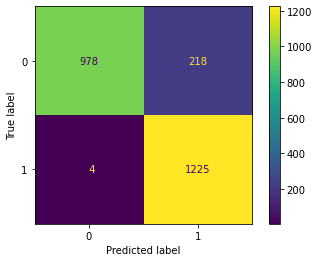

In [75]:
#Representación gráfica de los resultados de la matriz de confusión con el conjunto de pruebas
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_val, y_val, values_format='3g')

In [76]:
#Descripción de los resultados de diferentes métricas de medición sobre el modelo entrenado y probado
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[ 978  218]
 [   4 1225]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1196
           1       0.85      1.00      0.92      1229

    accuracy                           0.91      2425
   macro avg       0.92      0.91      0.91      2425
weighted avg       0.92      0.91      0.91      2425



## Entrenar y evaluar utilizando Support Vector Machine

In [78]:
#División del dataset en conjunto de entramiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_smoteT, y_smoteT, test_size = 0.25, random_state=0)

In [79]:
# Ajustar el SVM en el Conjunto de Entrenamiento
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [80]:
# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_val)

In [81]:
#Validación del accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.790


In [82]:
#Validación de la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[ 900,  296],
       [ 213, 1016]], dtype=int64)

C:\Users\eliza\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


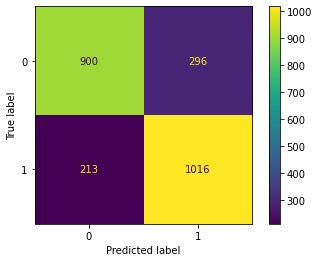

In [83]:
#Representación gráfica de los resultados de la matriz de confusión con el conjunto de pruebas
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_val, y_val, values_format='3g')

In [84]:
#Descripción de los resultados de diferentes métricas de medición sobre el modelo entrenado y probado
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[ 900  296]
 [ 213 1016]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1196
           1       0.77      0.83      0.80      1229

    accuracy                           0.79      2425
   macro avg       0.79      0.79      0.79      2425
weighted avg       0.79      0.79      0.79      2425



## Entrenar y evaluar utilizando Kernel Support Vector Machine

In [85]:
#División del dataset en conjunto de entramiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_smoteT, y_smoteT, test_size = 0.25, random_state=0)

In [86]:
# Ajustar el clasificador en el Conjunto de Entrenamiento
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf", random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [87]:
# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_val)

In [88]:
#Validación del accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.882


In [89]:
#Validación de la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[ 979,  217],
       [  69, 1160]], dtype=int64)

C:\Users\eliza\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


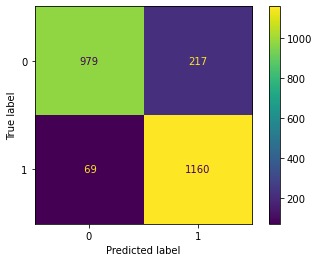

In [90]:
#Representación gráfica de los resultados de la matriz de confusión con el conjunto de pruebas
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_val, y_val, values_format='3g')

In [91]:
#Descripción de los resultados de diferentes métricas de medición sobre el modelo entrenado y probado
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[ 979  217]
 [  69 1160]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1196
           1       0.84      0.94      0.89      1229

    accuracy                           0.88      2425
   macro avg       0.89      0.88      0.88      2425
weighted avg       0.89      0.88      0.88      2425



## Entrenar y evaluar utilizando Naive Bayes

In [92]:
#División del dataset en conjunto de entramiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_smoteT, y_smoteT, test_size = 0.25, random_state=0)

In [102]:
from sklearn.naive_bayes import BernoulliNB

nb_clf = BernoulliNB(alpha=1.0e-10)
nb_clf.fit(X_train, y_train)

BernoulliNB(alpha=1e-10)

In [103]:
# Predicción de los resultados con el Conjunto de Testing
y_pred  = nb_clf.predict(X_val)

In [104]:
#Validación del accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.748


In [105]:
#Validación de la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[ 793,  403],
       [ 207, 1022]], dtype=int64)

C:\Users\eliza\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


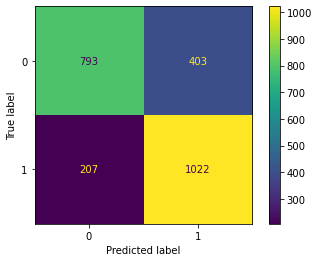

In [106]:
#Representación gráfica de los resultados de la matriz de confusión con el conjunto de pruebas
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb_clf, X_val, y_val, values_format='3g')

In [107]:
#Descripción de los resultados de diferentes métricas de medición sobre el modelo entrenado y probado
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[ 793  403]
 [ 207 1022]]
              precision    recall  f1-score   support

           0       0.79      0.66      0.72      1196
           1       0.72      0.83      0.77      1229

    accuracy                           0.75      2425
   macro avg       0.76      0.75      0.75      2425
weighted avg       0.75      0.75      0.75      2425



## Entrenar y evaluar utilizando árboles de decisión

In [108]:
#División del dataset en conjunto de entramiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_smoteT, y_smoteT, test_size = 0.25, random_state=0)

In [111]:
# Ajustar el clasificador de Árbol de Decisión en el Conjunto de Entrenamiento
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [112]:
# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_val)

In [113]:
#Validación del accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.925


In [114]:
#Validación de la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[1101,   95],
       [  88, 1141]], dtype=int64)

C:\Users\eliza\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


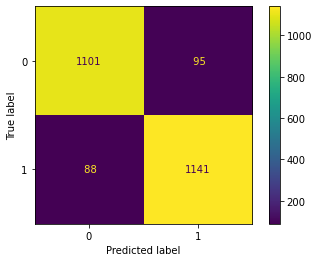

In [115]:
#Representación gráfica de los resultados de la matriz de confusión con el conjunto de pruebas
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_val, y_val, values_format='3g')

In [116]:
#Descripción de los resultados de diferentes métricas de medición sobre el modelo entrenado y probado
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[1101   95]
 [  88 1141]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1196
           1       0.92      0.93      0.93      1229

    accuracy                           0.92      2425
   macro avg       0.92      0.92      0.92      2425
weighted avg       0.92      0.92      0.92      2425

